In [2]:
library(psych)

In [3]:
# 22 companies with 8 different features.

mydata = read.csv("utilities.csv", header=T)

In [4]:
str(mydata)
mydata

'data.frame':	22 obs. of  9 variables:
 $ Company     : Factor w/ 22 levels "Arizona ","Boston ",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Fixed_charge: num  1.06 0.89 1.43 1.02 1.49 1.32 1.22 1.1 1.34 1.12 ...
 $ RoR         : num  9.2 10.3 15.4 11.2 8.8 13.5 12.2 9.2 13 12.4 ...
 $ Cost        : int  151 202 113 168 192 111 175 245 168 197 ...
 $ Load        : num  54.4 57.9 53 56 51.2 60 67.6 57 60.4 53 ...
 $ D.Demand    : num  1.6 2.2 3.4 0.3 1 -2.2 2.2 3.3 7.2 2.7 ...
 $ Sales       : int  9077 5088 9212 6423 3300 11127 7642 13082 8406 6455 ...
 $ Nuclear     : num  0 25.3 0 34.3 15.6 22.5 0 0 0 39.2 ...
 $ Fuel_Cost   : num  0.628 1.555 1.058 0.7 2.044 ...


Company,Fixed_charge,RoR,Cost,Load,D.Demand,Sales,Nuclear,Fuel_Cost
Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
Con Ed NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
Hawaiian,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
Idaho,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
Kentucky,1.34,13.0,168,60.4,7.2,8406,0.0,0.862
Madison,1.12,12.4,197,53.0,2.7,6455,39.2,0.623


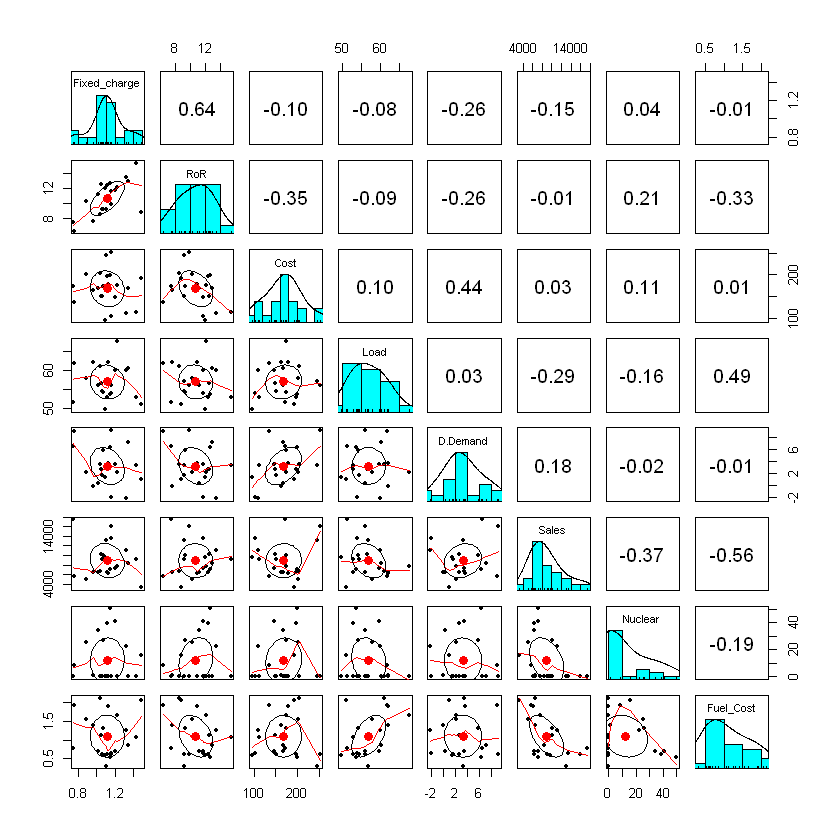

In [5]:
pairs.panels(mydata[-1])

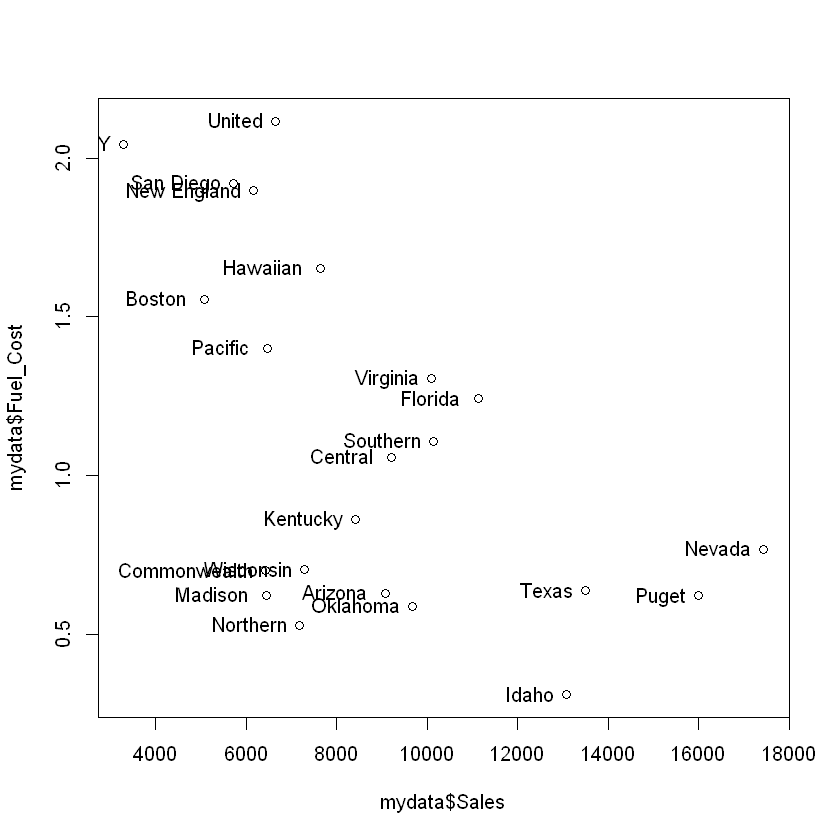

In [6]:
# Scatter plot 
plot(mydata$Fuel_Cost~ mydata$Sales, data = mydata)
with(mydata,text(mydata$Fuel_Cost ~ mydata$Sales, labels=mydata$Company,pos=2))

In [7]:
# Normalize 
z <- mydata[,-c(1)]
means <- apply(z,2,mean)
sds <- apply(z,2,sd)
nor <- scale(z,center=means,scale=sds)

In [8]:
# Calculate distance matrix  
distance = dist(nor)

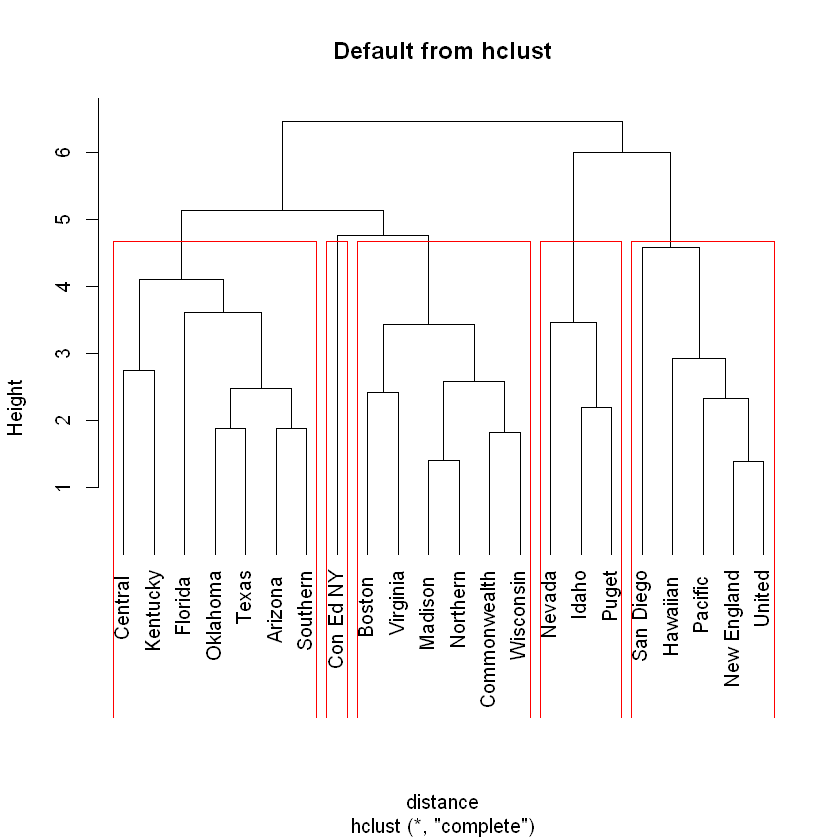

In [9]:
# Hierarchical agglomerative clustering  

mydata.hclust = hclust(distance)
plot(mydata.hclust,labels=mydata$Company,main='Default from hclust', hang=-1)
rect.hclust(mydata.hclust , k=5)

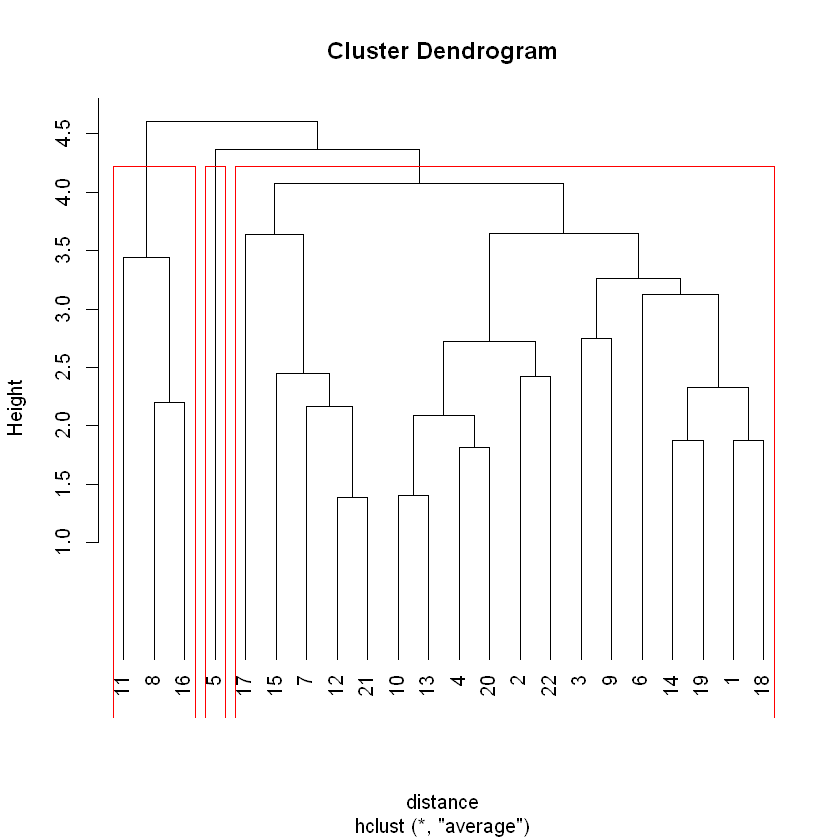

In [10]:
# Hierarchical agglomerative clustering using "average" linkage 
mydata.hclust = hclust(distance,method="average")
plot(mydata.hclust,hang=-1)
rect.hclust(mydata.hclust , k=3)

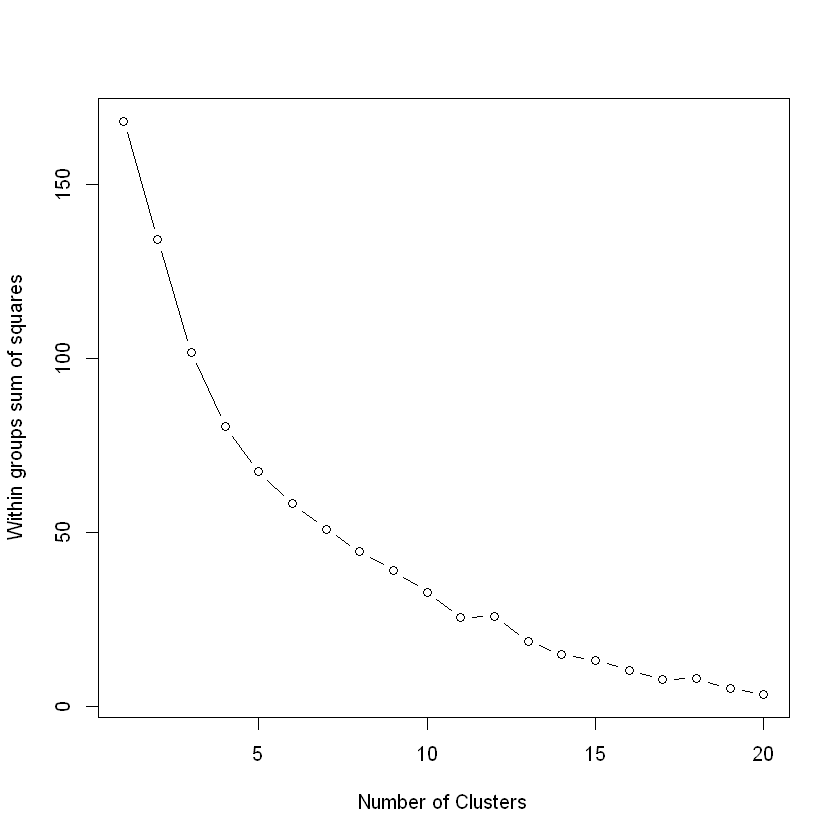

In [11]:
# Scree Plot

wss <- (nrow(nor)-1)*sum(apply(nor,2,var))
for (i in 2:20) wss[i] <- sum(kmeans(nor, centers=i)$withinss)
plot(1:20, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares")

In [12]:
# Cluster membership
member = cutree(mydata.hclust,3)
table(member)

member
 1  2  3 
18  1  3 

In [13]:
# Characterizing clusters 

aggregate(nor,list(member),mean)
aggregate(mydata[,-c(1,1)],list(member),mean)

Group.1,Fixed_charge,RoR,Cost,Load,D.Demand,Sales,Nuclear,Fuel_Cost
1,-0.01313873,0.1868016,-0.2552757,0.1520422,-0.1253617,-0.2215631,0.1071944,0.06692555
2,2.03732429,-0.8628882,0.5782326,-1.2950193,-0.7186431,-1.5814284,0.2143888,1.69263800
3,-0.60027572,-0.8331800,1.3389101,-0.4805802,0.9917178,1.8565214,-0.7146294,-0.96576599


Group.1,Fixed_charge,RoR,Cost,Load,D.Demand,Sales,Nuclear,Fuel_Cost
1,1.111667,11.155556,157.6667,57.65556,2.850000,8127.50,13.8,1.1399444
2,1.490000,8.800000,192.0000,51.20000,1.000000,3300.00,15.6,2.0440000
3,1.003333,8.866667,223.3333,54.83333,6.333333,15504.67,0.0,0.5656667


According to highest cluster contributers from this model the 3 clusters can be Characterized as:
1. low cost, medium sales
2. medium cost, low sales
3. high cost , high sales


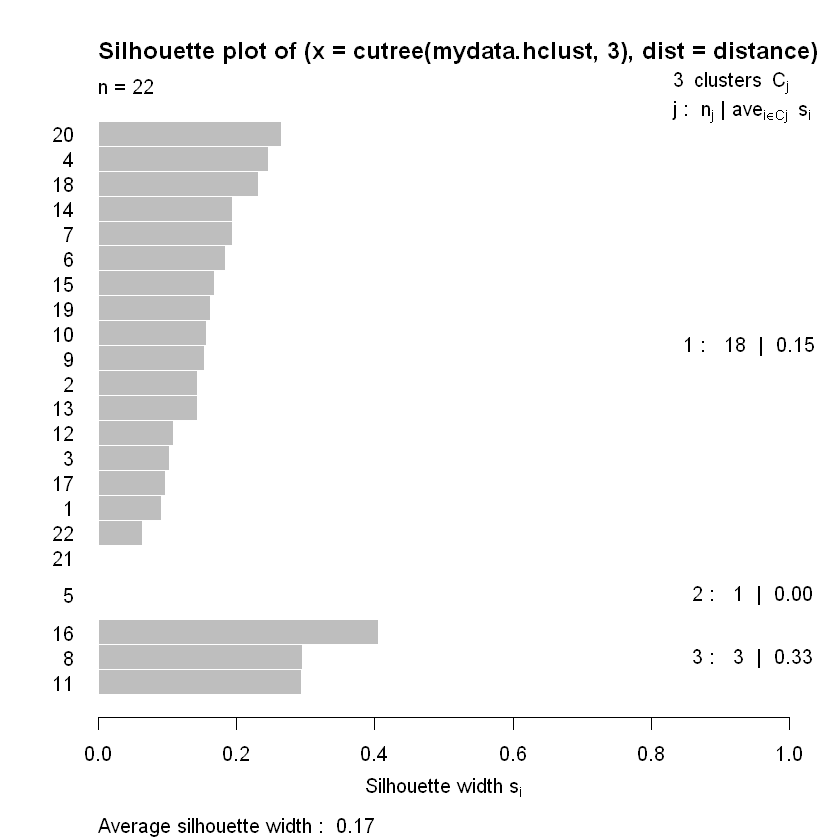

In [14]:
# Silhouette Plot

library(cluster) 
plot(silhouette(cutree(mydata.hclust,3), distance))

Cluster Membership seems healthy as most members have high Silhouette matric.There exist no outlier in any cluster.

# K-means clustering

In [15]:


set.seed(143)
kc = kmeans(nor,4)
kc

K-means clustering with 4 clusters of sizes 7, 5, 3, 7

Cluster means:
  Fixed_charge        RoR       Cost       Load    D.Demand      Sales
1   0.50431607  0.7795509 -0.9858961 -0.3375463 -0.48957692  0.3518600
2  -0.01133215  0.3313815  0.2189339 -0.3580408  0.16646865 -0.4018738
3  -0.60027572 -0.8331800  1.3389101 -0.4805802  0.99171778  1.8565214
4  -0.23896065 -0.6591748  0.2556961  0.7992527 -0.05435116 -0.8604593
     Nuclear  Fuel_Cost
1 -0.5232108 -0.4105368
2  1.5650384 -0.5954476
3 -0.7146294 -0.9657660
4 -0.2884040  1.2497562

Clustering vector:
 [1] 1 4 1 2 4 1 4 3 1 2 3 4 2 1 4 3 4 1 1 2 4 2

Within cluster sum of squares by cluster:
[1] 26.507769 10.177094  9.533522 34.164812
 (between_SS / total_SS =  52.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

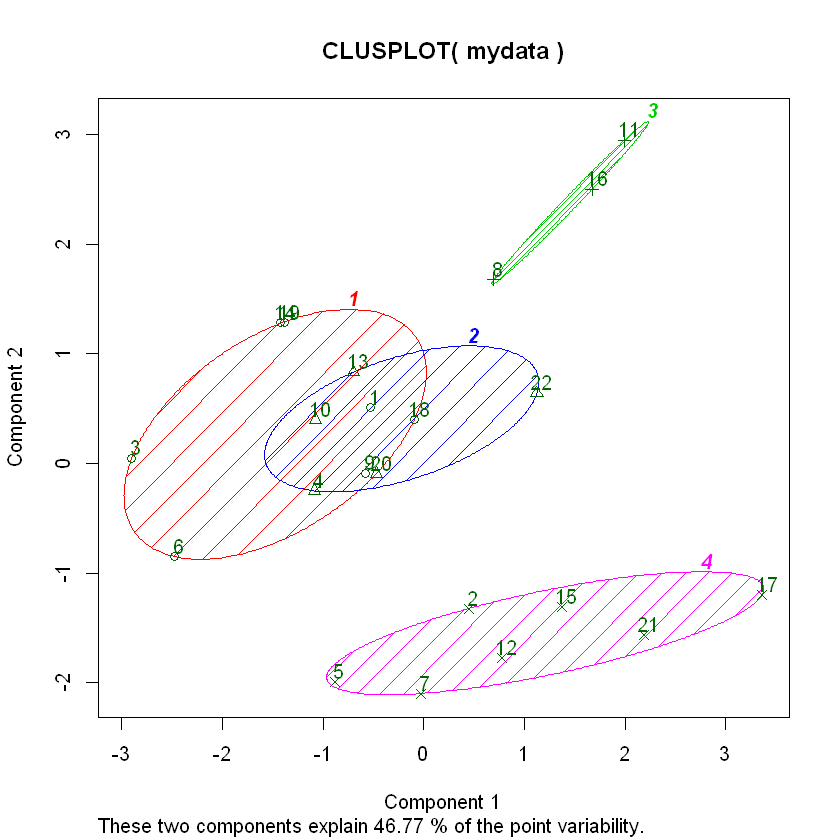

In [16]:
clusplot(mydata,
        kc$cluster,
        color = T,
        shade= T,
        labels= 2,
        lines = 0)

In [17]:
# for 3 clusters
set.seed(133)
kc = kmeans(nor,3)
kc

K-means clustering with 3 clusters of sizes 7, 8, 7

Cluster means:
  Fixed_charge        RoR       Cost       Load    D.Demand      Sales
1    0.5043161  0.7795509 -0.9858961 -0.3375463 -0.48957692  0.3518600
2   -0.2321860 -0.1053291  0.6389250 -0.4039931  0.47593707  0.4450244
3   -0.2389606 -0.6591748  0.2556961  0.7992527 -0.05435116 -0.8604593
     Nuclear  Fuel_Cost
1 -0.5232108 -0.4105368
2  0.7101630 -0.7343170
3 -0.2884040  1.2497562

Clustering vector:
 [1] 1 3 1 2 3 1 3 2 1 2 2 3 2 1 3 2 3 1 1 2 3 2

Within cluster sum of squares by cluster:
[1] 26.50777 46.12529 34.16481
 (between_SS / total_SS =  36.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

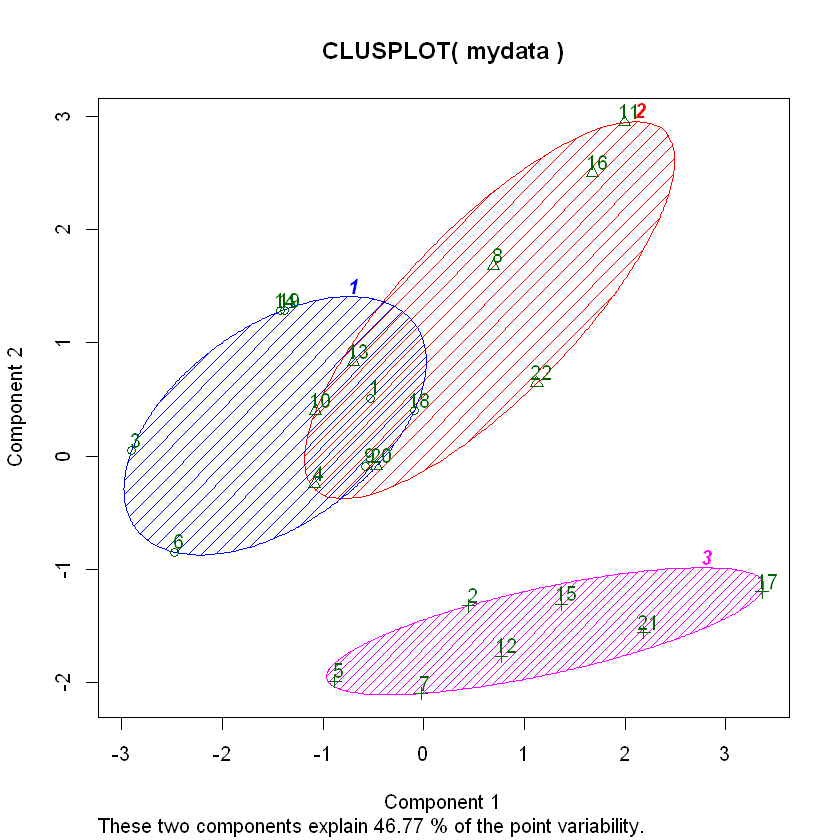

In [18]:
clusplot(mydata,
        kc$cluster,
        color = T,
        shade= T,
        labels= 2,
        lines = 0)

Cluster Seperation is better when 4 clusters are made.
Having 3 clusters is suited to reduce the overall marketing price.